# Demo Notebook 2022-06-20

Demos from the live sessions on 2022-06-20.


## Setup

Ye olde setup chunk below.


In [1]:
import grama as gr
import pandas as pd
DF = gr.Intention()
%matplotlib inline

## Preview: Using layers

We'll cover this in a [future exercise](https://zdelrosario.github.io/evc-course/exercises_solution/d09-e-vis03-scatterplot-solution.html), but for the moment let's have a preview of the *layer* functionality in ggplot. We'll use the diamonds dataset to demonstrate.


In [2]:
from grama.data import df_diamonds


Make a plot highlighting only the `"Fair"` diamonds.

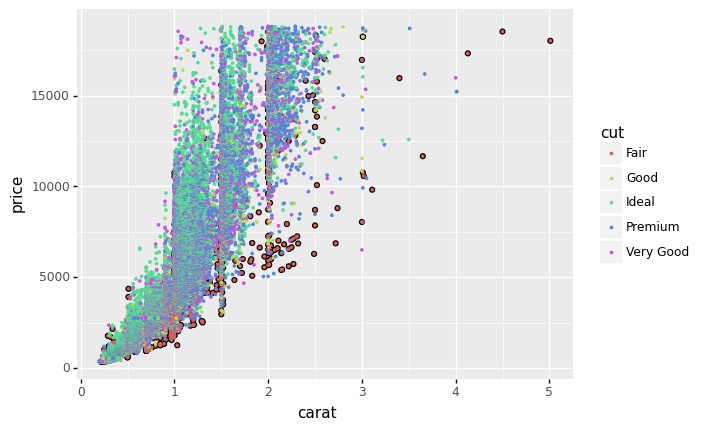

<ggplot: (8768999007735)>

In [3]:
(
    df_diamonds
    
    >> gr.ggplot(gr.aes("carat", "price"))
    + gr.geom_point(
        # Layer functionality: Specify the data for this geom_point *only*
        data=df_diamonds
        >> gr.tf_filter(DF.cut == "Fair"),
        # Make this set of points a "black highlight"
        color="black",
    )
    # This layer inherits the full dataset
    + gr.geom_point(
        # Layer functionality: Color the small points by `cut` (instead of all black)
        gr.aes(color="cut"), 
        # Reducing point size allows the "black highlight" to show
        size=0.5,
    )
)

## Jupyter shows last command

Jupyter shows the results of the **last command run in the cell**. This can make it difficult to show multiple quantities.


In [4]:
x = 1
y = 2

x # This won't be shown
y # This will be shown

2

To show multiple quantities from a single cell, we can use a `print()` statement.

In [5]:
print(x) # Using a print() will definitely show!
print(y)

1
2


We can use `print()` statements with more complex operations as well, as the next cell demonstrates.


   carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39


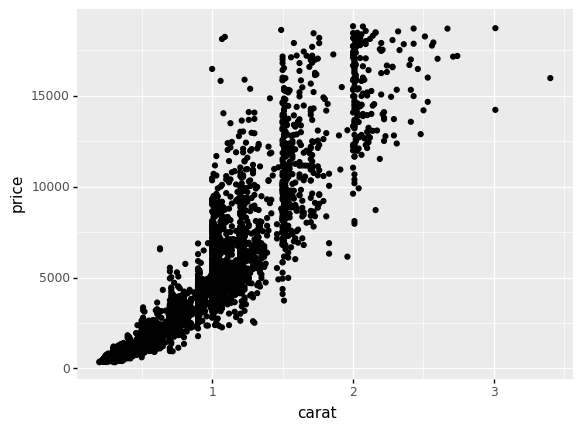

In [6]:
print(
    df_diamonds
    >> gr.tf_head(10)
)

print(
    df_diamonds
    >> gr.tf_sample(5000)
    
    >> gr.ggplot(gr.aes("carat", "price"))
    + gr.geom_point()
)

## Scales

We'll talk about this more in a [future exercise](https://zdelrosario.github.io/evc-course/exercises_solution/d09-e-vis03-scatterplot-solution.html#scales), but we can use *scales* to modify the way ggplot maps variables to aesthetics. We'll demo with the Titanic dataset from c01.


In [7]:
df_titanic = pd.read_csv("../challenges/data/titanic.csv")

df_prop = (
    df_titanic
    >> gr.tf_group_by(DF.Class, DF.Sex, DF.Age)
    >> gr.tf_mutate(
        Total=gr.sum(DF.n),
        Prop=DF.n/gr.sum(DF.n),
    )
    >> gr.tf_ungroup()
)

We can use scales to change which numerical values are shown, or even to override the `labels` for the numerical values. For instance, we can use this to show percentages, rather than proportions:

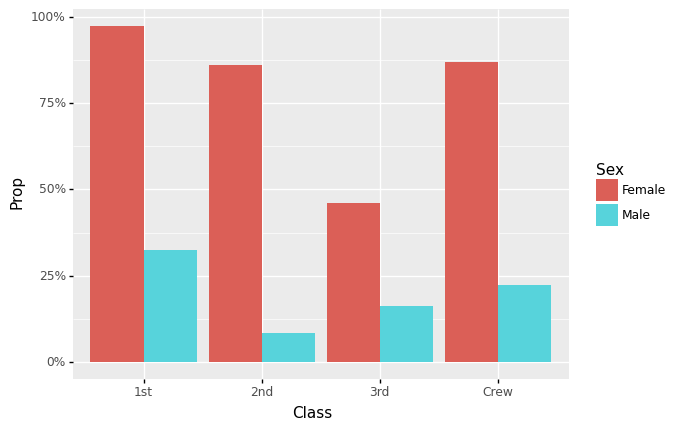

<ggplot: (8769016423012)>

In [8]:
(
    df_prop
    >> gr.tf_filter(DF.Survived == "Yes", DF.Age == "Adult")
    
    >> gr.ggplot(gr.aes("Class", "Prop", fill="Sex"))
    + gr.geom_col(position="dodge")
    + gr.scale_y_continuous(
        breaks=[0, 0.25, 0.5, 0.75, 1],
        labels=["0%", "25%", "50%", "75%", "100%"],
    )
)


We can use a `scale` for **any** aesthetic in ggplot. For instance, the following modifies the range of sizes used to visualize a discrete variable. (NB. This isn't necessarily a *good* way to visualize the `cut`---ggplot even warns us about this choice!)


/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.


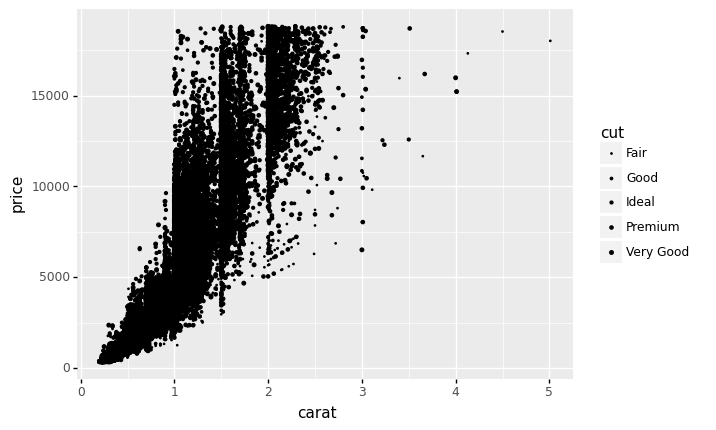

<ggplot: (8768999180719)>

In [9]:
(
    df_diamonds
    >> gr.ggplot(gr.aes("carat", "price", size="cut"))
    + gr.geom_point()
    + gr.scale_size_discrete(range=(0.1, 1))
)

## My primary Titanic vis


/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_col : Removed 2 rows containing missing values.


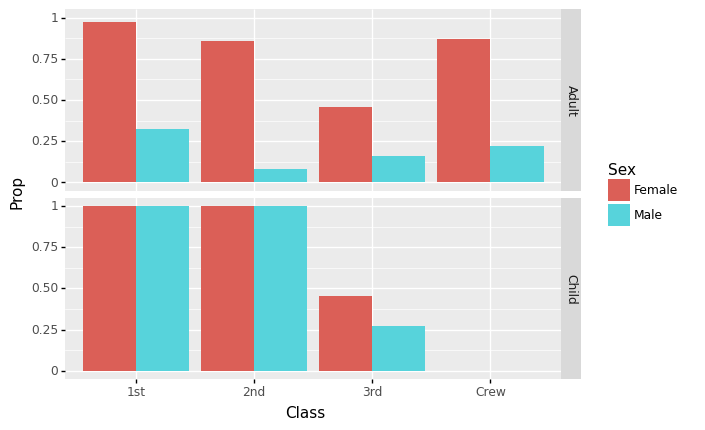

<ggplot: (8768999212045)>

In [10]:
(
    df_prop
    >> gr.tf_filter(DF.Survived == "Yes")
    
    >> gr.ggplot(gr.aes("Class", "Prop", fill="Sex"))
    + gr.geom_col(position="dodge")
    + gr.facet_grid("Age~.")
)


## "Multiple" x-axes

It was asked during the evening session if there is a way to accomplish "multiple" x-axes in a single plot. The way to do this in ggplot is to "dodge" the bars. We can add more groups to this dodging by modifying the data to create a new column, as I show below:


/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_col : Removed 2 rows containing missing values.


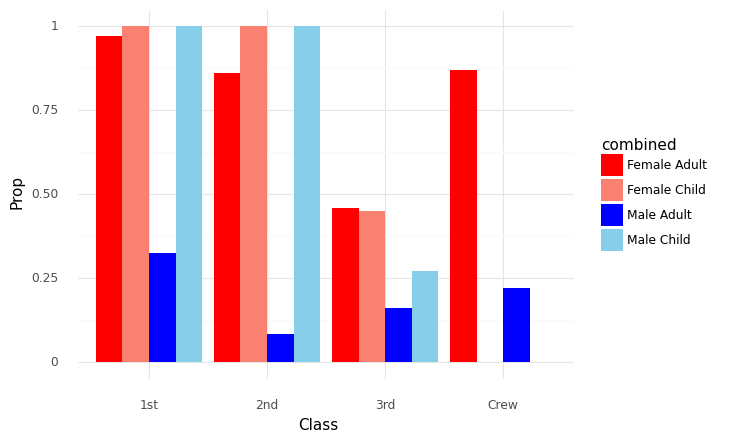

<ggplot: (8769053648887)>

In [11]:
(
    df_prop
    >> gr.tf_filter(DF.Survived == "Yes")
    # Modify the data to combine the Sex and Age variables into one string column
    >> gr.tf_mutate(combined=gr.str_c(DF.Sex, " ", DF.Age))
    
    >> gr.ggplot(gr.aes("Class", "Prop", fill="combined"))
    # position="dodge" un-stacks the bars
    + gr.geom_col(position="dodge") 
    # Set manual fill colors to associate the bars visually
    + gr.scale_fill_manual(
        values={
            "Female Adult": "red",
            "Female Child": "salmon",
            "Male Adult": "blue",
            "Male Child": "skyblue",
        }
    )
    + gr.theme_minimal()
)
